In [27]:
import matplotlib.pyplot as plt
import scipy.stats as sts 
import numpy as np 

### Original distribution

In [28]:
def f(x):
    z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1-(x/7)**2) **0.5/z
    elif abs (x) > 1:
        return ((3 - abs(x))/2 - 3/7 * 10**0.5 * ((3-x**2+2*abs(x))**0.5-2))/z
    elif abs (x) > 0.75:
        return (9-8*abs(x))/z
    elif abs(x)>0.5:
        return (3*abs(x) + 0.75)/z
    else: 
        return 2.25/z

In [31]:
def sampling(initial, step, sim):
    sampling = []
    sampling.append(initial)
    sim_times = int(sim/step)    
    
    for t in range (sim_times):
        x_t = sampling[-1]
        for i in range (step):
            proposal = sts.norm (loc = x_t, scale = 2).rvs(1)[0]
            prob = min (1, f(proposal)/f(x_t))
            if sts.uniform (0,1).rvs(1)[0] < prob: 
                x_t = proposal
        sampling.append(x_t)    
    samples = sampling [1:]
    return samples

values = sampling (0, 100, 100000)

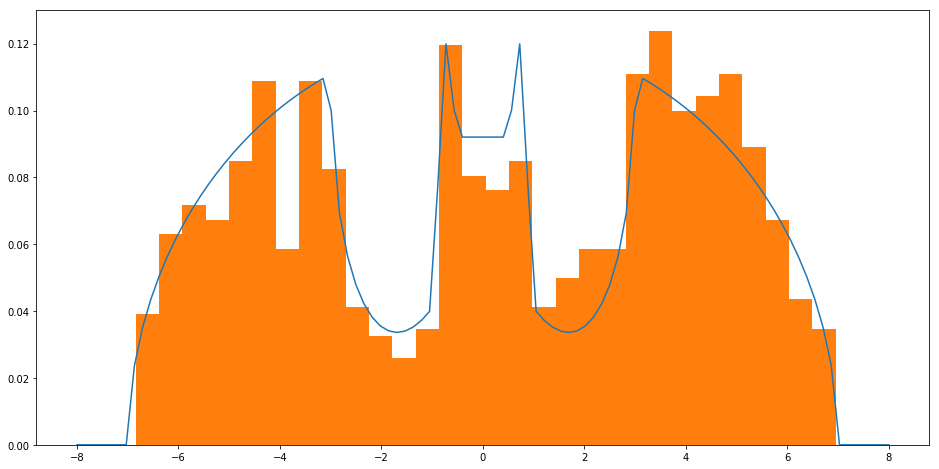

In [32]:
x = np.linspace(-8,8,100)
y = [f(i) for i in x]

plt.figure(figsize=(16,8))
plt.plot(x,y)
plt.hist(values, bins=30, density=True)
plt.show()